# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [6]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# TODO: Set up a connection the "Market.db" database

# Connect to the SQLite database
connection = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cursor = connection.cursor()


### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [4]:
# TODO: Write a SQL query which will answer the question above.

# Execute the query
cursor.execute("""
    SELECT COUNT(*) AS TotalCheapProducts
    FROM Products
    WHERE Price < 10;
""")


rows = cursor.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [5]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT(*) AS SupplierCount
    FROM Suppliers
    GROUP BY Country
    ORDER BY SupplierCount DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


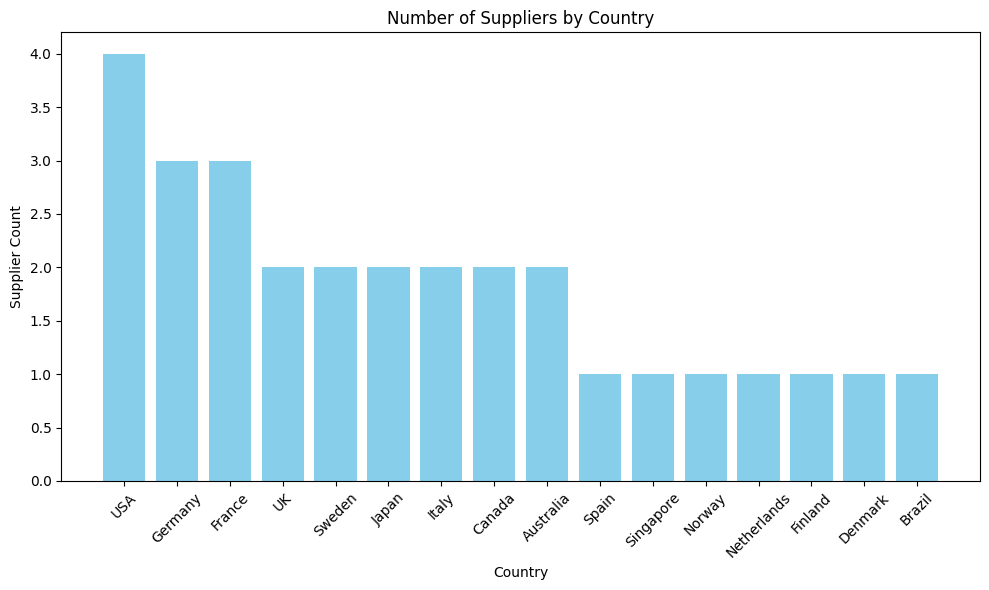

In [6]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'SupplierCount'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
plt.bar(df['Country'], df['SupplierCount'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Number of Suppliers by Country')
plt.xlabel('Country')
plt.ylabel('Supplier Count')
plt.tight_layout()
plt.show()


### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [7]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT(*) AS CustomerCount
    FROM Customers
    GROUP BY Country
    ORDER BY CustomerCount DESC;
""")

# TODO: Fetch your list of tuples and print it out
q3_results = cursor.fetchall()
print("Most common customer countries (by count):")
for country, count in q3_results:
    print(f"{country}: {count}")

Most common customer countries (by count):
USA: 13
Germany: 11
France: 11
Brazil: 9
UK: 7
Spain: 5
Mexico: 5
Venezuela: 4
Italy: 3
Canada: 3
Argentina: 3
Switzerland: 2
Sweden: 2
Portugal: 2
Finland: 2
Denmark: 2
Belgium: 2
Austria: 2
Poland: 1
Norway: 1
Ireland: 1


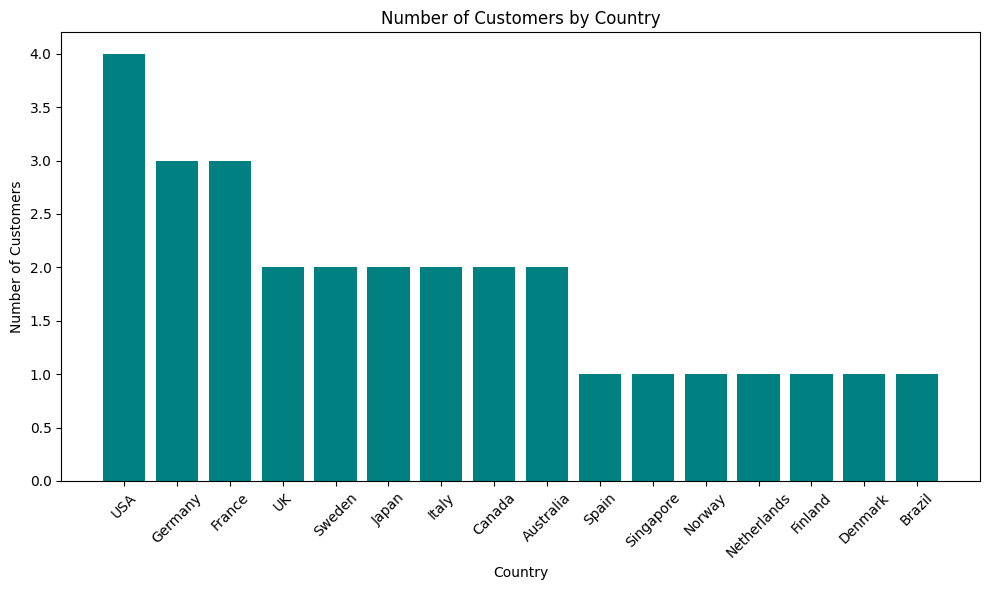

In [9]:
# TODO: Convert your list of tuples to a dataframe
q3_df = pd.DataFrame(rows, columns=['Country', 'CustomerCount'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize=(10, 6))
plt.bar(q3_df['Country'], q3_df['CustomerCount'], color='teal')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [10]:
# TODO: Write a SQL query which will answer the question above.

# Execute SQL query
# SQL logic is solid:
cursor.execute("""
SELECT 
    p.ProductName,
    SUM(od.Quantity) AS TotalQuantity
FROM 
    OrderDetails od
JOIN 
    Products p ON od.ProductID = p.ProductID
GROUP BY 
    p.ProductName
ORDER BY 
    TotalQuantity ASC
LIMIT 20;
""")

results = cursor.fetchall()
columns = ['ProductName', 'TotalQuantity']
df4 = pd.DataFrame(results, columns=columns)

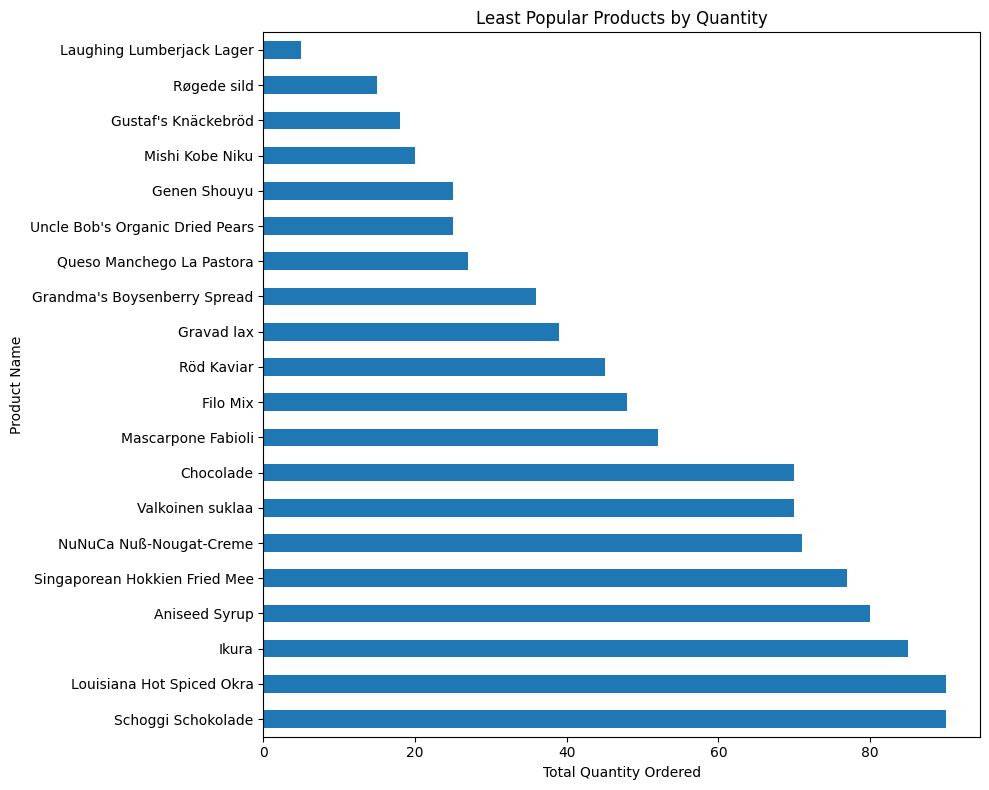

In [11]:

df4.plot(kind='barh', x='ProductName', y='TotalQuantity', figsize=(10, 8), legend=False)
plt.title('Least Popular Products by Quantity')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # to show smallest at the top
plt.tight_layout()
plt.show()


### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [12]:
# Execute SQL query for least popular products by revenue
cursor.execute("""
SELECT 
    p.ProductName,
    SUM(od.Quantity * p.Price) AS TotalRevenue
FROM 
    OrderDetails od
JOIN 
    Products p ON od.ProductID = p.ProductID
GROUP BY 
    p.ProductName
ORDER BY 
    TotalRevenue ASC
LIMIT 20;
""")

# Fetch and format results
results = cursor.fetchall()
columns = ['ProductName', 'TotalRevenue']
df5 = pd.DataFrame(results, columns=columns)

# Display the DataFrame
print(df5)


                        ProductName  TotalRevenue
0         Laughing Lumberjack Lager          70.0
1                       Røgede sild         142.5
2                          Filo Mix         336.0
3               Gustaf's Knäckebröd         378.0
4                      Genen Shouyu         387.5
5                             Konbu         552.0
6                        Röd Kaviar         675.0
7                Guaraná Fantástica         711.0
8   Uncle Bob's Organic Dried Pears         750.0
9                           Geitost         790.0
10                    Aniseed Syrup         800.0
11                        Chocolade         892.5
12     Grandma's Boysenberry Spread         900.0
13                    Zaanse koeken         959.5
14          NuNuCa Nuß-Nougat-Creme         994.0
15                       Gravad lax        1014.0
16        Queso Manchego La Pastora        1026.0
17    Singaporean Hokkien Fried Mee        1078.0
18             Rhönbräu Klosterbier        1116.0


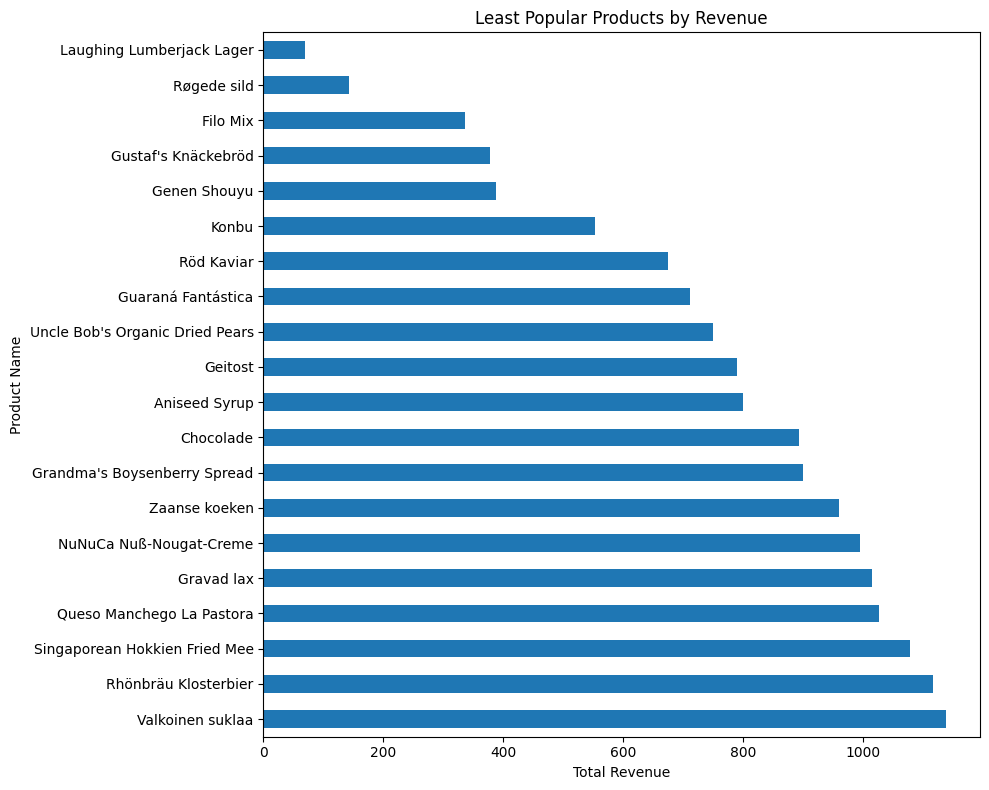

In [13]:
df5.plot(kind='barh', x='ProductName', y='TotalRevenue', figsize=(10, 8), legend=False)
plt.title('Least Popular Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [14]:
# Execute SQL query to find countries with most orders
cursor.execute("""
SELECT 
    c.Country,
    COUNT(o.OrderID) AS TotalOrders
FROM 
    Orders o
JOIN 
    Customers c ON o.CustomerID = c.CustomerID
GROUP BY 
    c.Country
ORDER BY 
    TotalOrders DESC;
""")

# Fetch and format results
results = cursor.fetchall()
columns = ['Country', 'TotalOrders']
df6 = pd.DataFrame(results, columns=columns)

# Display the DataFrame
print(df6)


        Country  TotalOrders
0           USA           29
1       Germany           25
2        Brazil           19
3        France           18
4       Austria           13
5            UK           12
6     Venezuela            9
7        Mexico            9
8        Canada            9
9       Finland            8
10       Sweden            7
11        Spain            7
12        Italy            7
13      Ireland            6
14     Portugal            5
15  Switzerland            4
16      Denmark            4
17      Belgium            2
18       Poland            1
19       Norway            1
20    Argentina            1


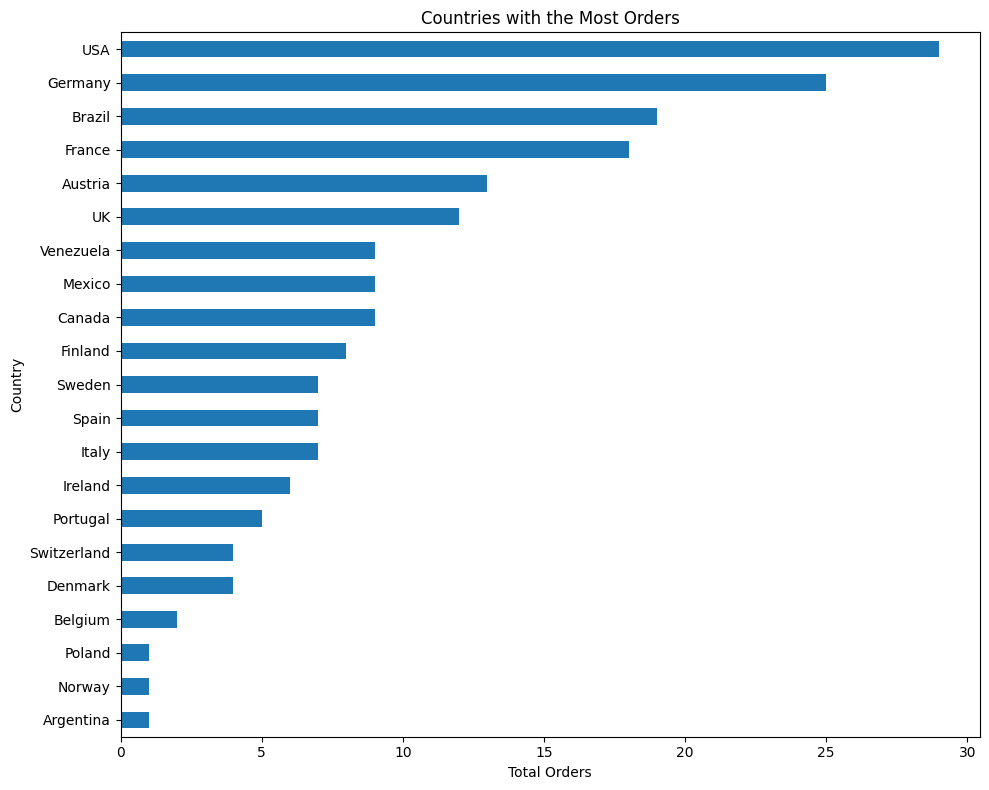

In [15]:
df6.plot(kind='barh', x='Country', y='TotalOrders', figsize=(10, 8), legend=False)
plt.title('Countries with the Most Orders')
plt.xlabel('Total Orders')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [16]:
# Execute SQL query to find countries with customers who placed no orders
cursor.execute("""
SELECT 
    c.Country,
    COUNT(c.CustomerID) AS CustomersWithNoOrders
FROM 
    Customers c
LEFT JOIN 
    Orders o ON c.CustomerID = o.CustomerID
WHERE 
    o.OrderID IS NULL
GROUP BY 
    c.Country
ORDER BY 
    CustomersWithNoOrders DESC;
""")

# Fetch and format results
results = cursor.fetchall()
columns = ['Country', 'CustomersWithNoOrders']
df7 = pd.DataFrame(results, columns=columns)

# Display the DataFrame
print(df7)


     Country  CustomersWithNoOrders
0        USA                      5
1     France                      4
2    Germany                      2
3  Argentina                      2
4         UK                      1
5      Spain                      1
6     Canada                      1
7    Belgium                      1


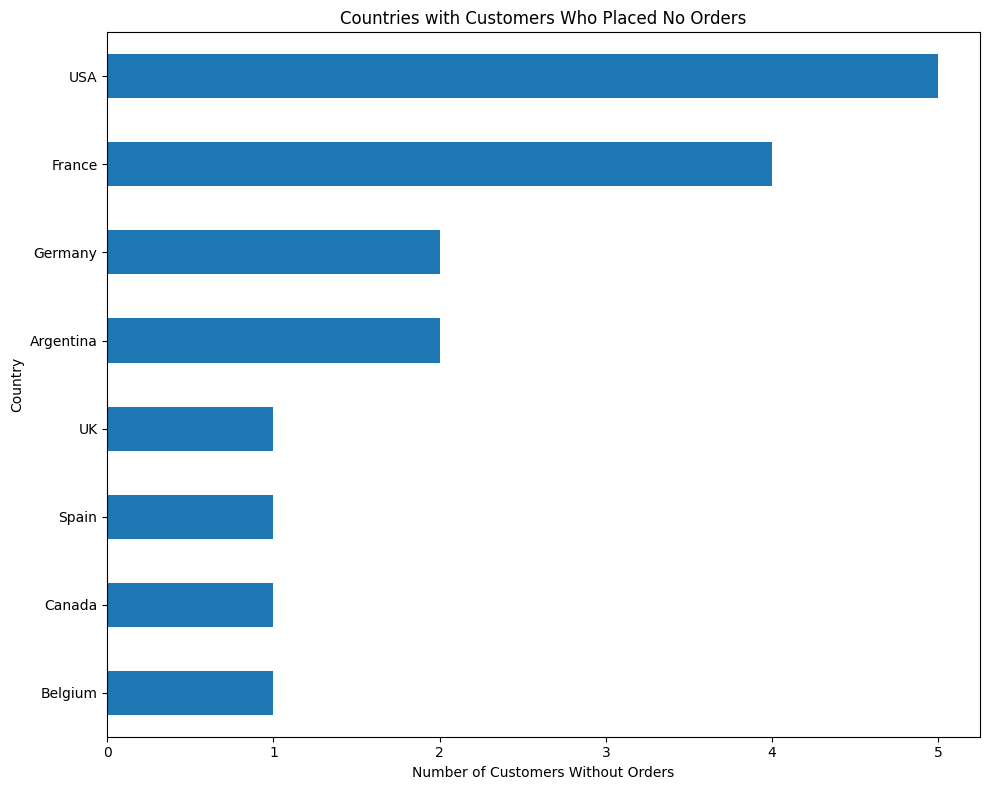

In [17]:
df7.plot(kind='barh', x='Country', y='CustomersWithNoOrders', figsize=(10, 8), legend=False)
plt.title('Countries with Customers Who Placed No Orders')
plt.xlabel('Number of Customers Without Orders')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [18]:
# Execute SQL query to find most popular suppliers by order count
cursor.execute("""
SELECT 
    s.SupplierName,
    COUNT(DISTINCT od.OrderID) AS OrderCount
FROM 
    OrderDetails od
JOIN 
    Products p ON od.ProductID = p.ProductID
JOIN 
    Suppliers s ON p.SupplierID = s.SupplierID
GROUP BY 
    s.SupplierName
ORDER BY 
    OrderCount DESC;
""")

# Fetch and format results
results = cursor.fetchall()
columns = ['SupplierName', 'OrderCount']
df8 = pd.DataFrame(results, columns=columns)

# Display the DataFrame
print(df8)


                              SupplierName  OrderCount
0        Plutzer Lebensmittelgroßmärkte AG          37
1                            Pavlova, Ltd.          37
2                 Specialty Biscuits, Ltd.          33
3                          Norske Meierier          30
4                  Formaggi Fortini s.r.l.          27
5                             Gai pâturage          26
6                            Exotic Liquid          21
7                     Pasta Buttini s.r.l.          20
8               New Orleans Cajun Delights          20
9                                Ma Maison          19
10                               Karkki Oy          19
11                             G'day, Mate          18
12             New England Seafood Cannery          17
13                                Mayumi's          16
14                            Leka Trading          16
15                       Bigfoot Breweries          16
16                        Forêts d'érables          15
17        

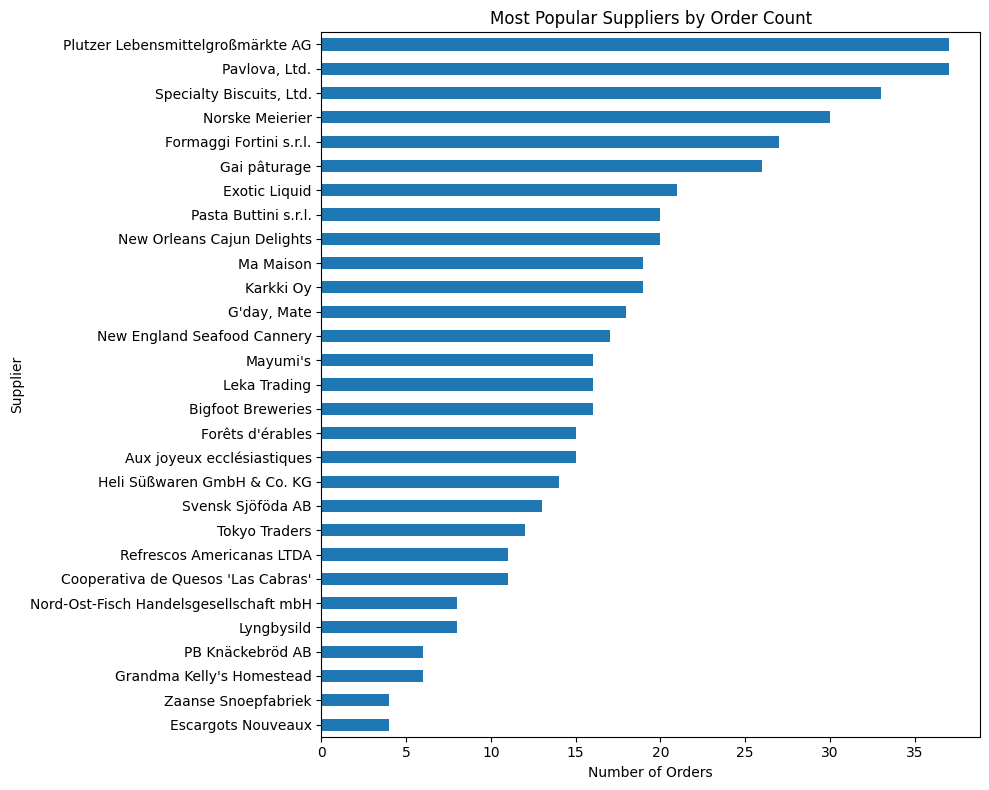

In [19]:
df8.plot(kind='barh', x='SupplierName', y='OrderCount', figsize=(10, 8), legend=False)
plt.title('Most Popular Suppliers by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('Supplier')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

The United States has the most customer and the most suppliers of all countries. There is strong evidence suggesting a larger customer base will lead to more supppliers as to supply to local customer demand. (We look at q3 & q2 charts). The same is true with Germany, a nation with the 2nd largest customer base and 2nd largest supplier.

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

It is the laughing number lumberjack, which is the least ordered and has the lowest revenue. While there may be a correlaton of few orders to a smaller revenue, it is not exactly true. If we look at the bottom 4 order quantity and compare it to the bottom 4 revenue, they are not exactly the same. This simply means some products have a high price mark which would sell at a smaller rate. 

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

There seems to be a medium correlation between customers who ordered the most to count of customers who ordered nothing by nation. If we look at the bottom four for each of the respective category, we'll realize there is match for 3/4. Although, this can be connected more to customer base size as opposed to customer orders.

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

Pluzter AG and Pavola have the most orders. If we look at question 8 visualization, it will reflect such.